In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress, gaussian_kde

import math

In [27]:
Hoe = pd.read_csv("hoevsoere1hr_uvw.csv")
Hoe.columns = ['u', 'v', 'w']
print(Hoe.head())

           u         v         w
0  12.314115  0.001521  0.109761
1  12.145154 -0.061623  0.000982
2  12.078512 -0.045743  0.201192
3  12.228003  0.113929  0.150276
4  12.238973 -0.094025 -0.149460


In [28]:
f_s = 20 #Hz, sampling frequency

# Data 1

## a)

In [29]:
u_mean=np.mean(np.abs(Hoe['u']))
v_mean=np.mean(np.abs(Hoe['v']))
w_mean=np.mean(np.abs(Hoe['w']))

print(f'the mean value of u is {u_mean}')
print(f'the mean value of v is {v_mean}')
print(f'the mean value of w is {w_mean}')


u_var=np.var(np.abs(Hoe['u']))
v_var=np.var(np.abs(Hoe['v']))
w_var=np.var(np.abs(Hoe['w']))

print(f'the variance value of u is {u_var}')
print(f'the variance value of v is {v_var}')
print(f'the variance value of w is {w_var}')

the mean value of u is 13.15156249904886
the mean value of v is 0.677031548071707
the mean value of w is 0.4824558580409619
the variance value of u is 1.8940270896532907
the variance value of v is 0.27355235323061644
the variance value of w is 0.15534414727789828


## b)

In [30]:
Hoe["uw"] = Hoe["u"]*Hoe["w"]
print(Hoe.head())
u_star= (-1*np.mean(Hoe['uw']))**(1/2)
print(u_star)

           u         v         w        uw
0  12.314115  0.001521  0.109761  1.351612
1  12.145154 -0.061623  0.000982  0.011930
2  12.078512 -0.045743  0.201192  2.430095
3  12.228003  0.113929  0.150276  1.837576
4  12.238973 -0.094025 -0.149460 -1.829231
0.5290761951655588


## c)

Split spectra

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/242117605.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


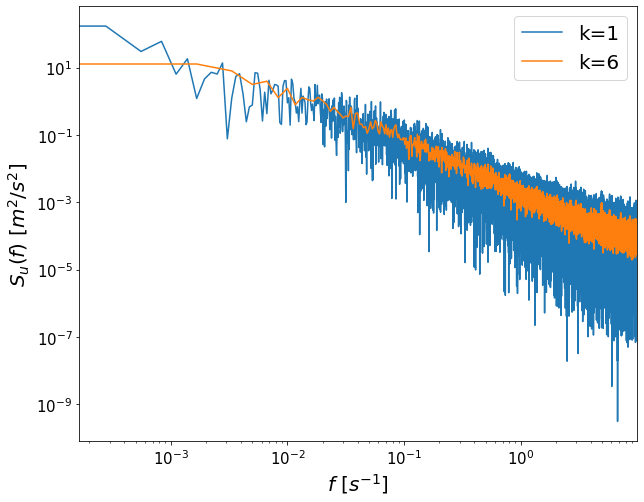

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/242117605.py:68: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


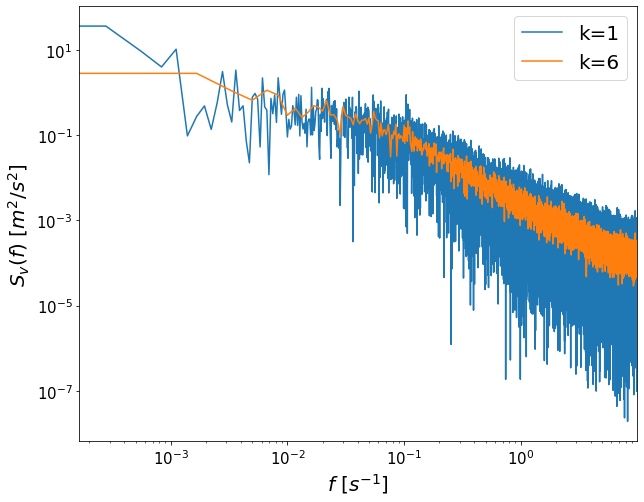

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/242117605.py:82: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


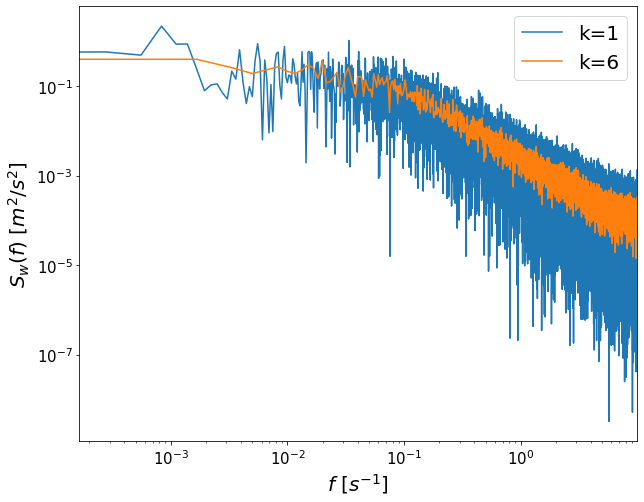

In [31]:
def split_and_calculate_spectra(hoevsoere, k_guess):
    N = len(hoevsoere.u)
    N_series = N // k_guess
    spectra_avg_u = []
    spectra_avg_v = []
    spectra_avg_w = []

    for k in range(k_guess):
        Series_k_u = hoevsoere.u[k * N_series:(k + 1) * N_series]
        Series_k_v = hoevsoere.v[k * N_series:(k + 1) * N_series]
        Series_k_w = hoevsoere.w[k * N_series:(k + 1) * N_series]

        # Frequency Estimations
        N_f = N_series // 2
        f_l = np.fft.fftfreq(N_series, 1 / f_s)[:N_f]

        # Spectra Calculation
        spectra_u = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_u))**2

        spectra_avg_u.append(spectra_u[:N_f])
        
        spectra_v = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_v))**2

        spectra_avg_v.append(spectra_v[:N_f])
        
        spectra_w = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_w))**2

        spectra_avg_w.append(spectra_w[:N_f])

    return f_l, np.mean(spectra_avg_u, axis=0), np.mean(spectra_avg_v, axis=0), np.mean(spectra_avg_w, axis=0), Series_k_u, Series_k_v, Series_k_w

k_guess = 6  
f_l_6, spectra_avg_u_6, spectra_avg_v_6, spectra_avg_w_6, Series_k_u_1, Series_k_v_1, Series_k_w_1 = split_and_calculate_spectra(Hoe, k_guess)

k_guess = 1 
f_l_1, spectra_avg_u_1, spectra_avg_v_1, spectra_avg_w_1, Series_k_u_6, Series_k_v_6, Series_k_w_6 = split_and_calculate_spectra(Hoe, k_guess)

spectra_avg_u_6[0] = spectra_avg_u_6[1]
spectra_avg_u_1[0] = spectra_avg_u_1[1]

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_u_1)
plt.plot(f_l_6, spectra_avg_u_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

spectra_avg_v_1[0] = spectra_avg_v_1[1]

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_v_1)
plt.plot(f_l_6, spectra_avg_v_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_w_1)
plt.plot(f_l_6, spectra_avg_w_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

## d)

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:223: RuntimeWarning: invalid value encountered in true_divide
  simiu_1_u = u_star**2*100*n_1/((1+50*n_1)**(5/3)*decade_1)
C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:224: RuntimeWarning: invalid value encountered in true_divide
  simiu_6_u = u_star**2*100*n_6/((1+50*n_6)**(5/3)*decade_6[0:53])
C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:229: RuntimeWarning: invalid value encountered in true_divide
  simiu_1_v = u_star**2*7.5*n_1/((1+9.5*n_1)**(5/3)*decade_1)
C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:230: RuntimeWarning: invalid value encountered in true_divide
  simiu_6_v = u_star**2*7.5*n_6/((1+9.5*n_6)**(5/3)*decade_6[0:53])
C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:235: RuntimeWarning: invalid value encountered in true_divide
  simiu_1_w = u_star**2*1.68*n_1/((1+10*n_1**(5/3))*decade_1)
C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/

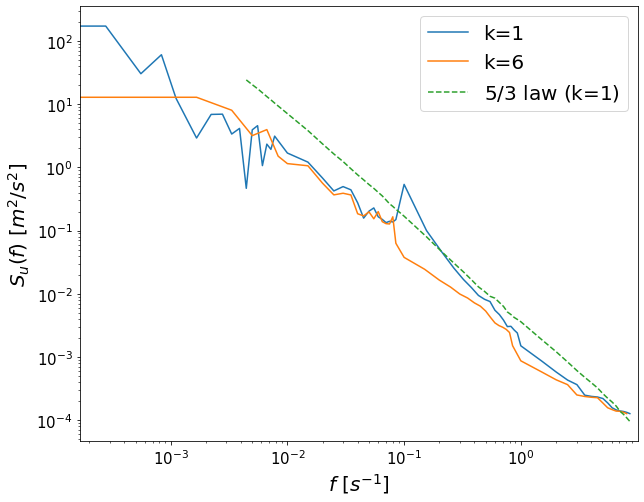

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:293: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


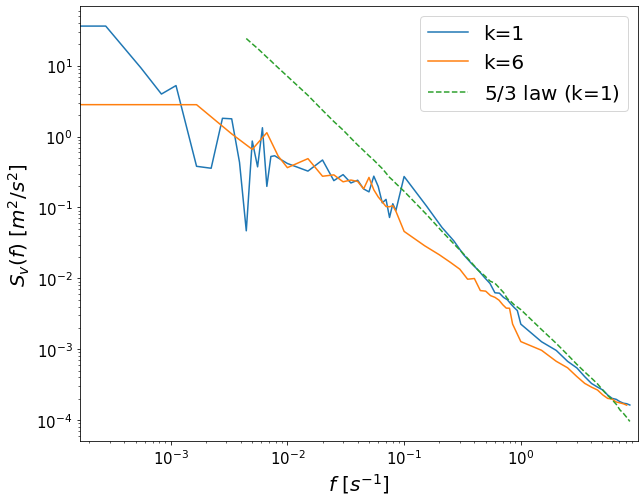

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:311: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


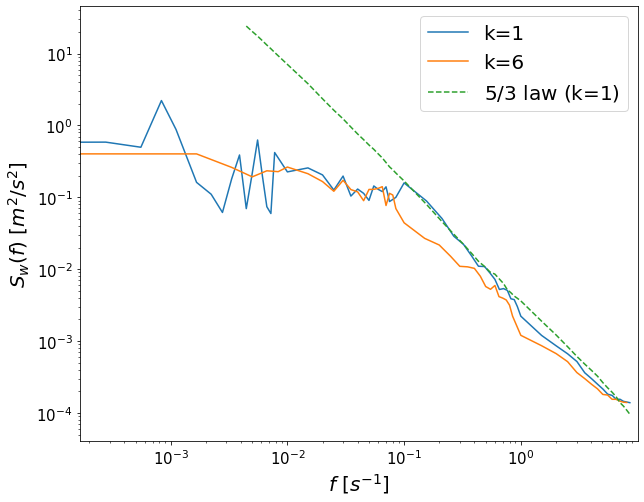

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:365: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1), np.max(f_l_1)))


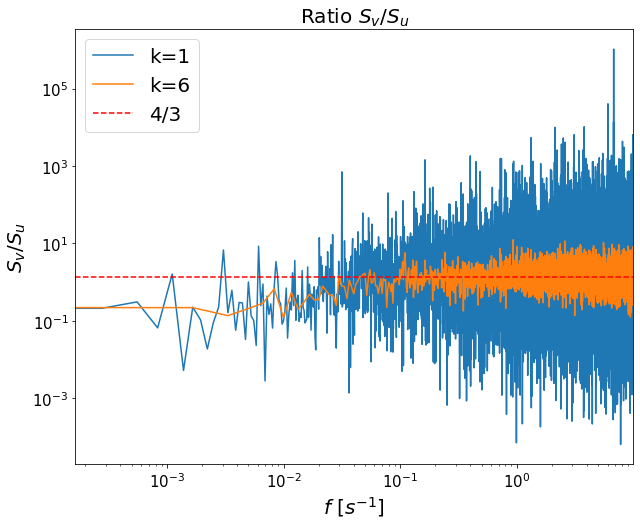

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/1459102567.py:381: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1), np.max(f_l_1)))


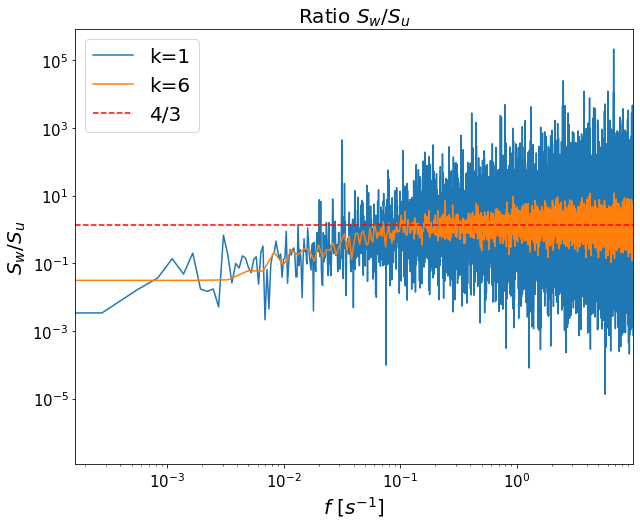

In [32]:
decade_1_1 = f_l_1[f_l_1 <= 10e-4]
decade_1_2 = f_l_1[(f_l_1 <= 10e-3) & (f_l_1 > 10e-4)]
decade_1_3 = f_l_1[(f_l_1 <= 10e-2) & (f_l_1 > 10e-3)]
decade_1_4 = f_l_1[(f_l_1 <= 10e-1) & (f_l_1 > 10e-2)]
decade_1_5 = f_l_1[(f_l_1 <= 10e0) & (f_l_1 > 10e-1)]


decade_6_1 = f_l_6[f_l_6 <= 10e-4]
decade_6_2 = f_l_6[(f_l_6 <= 10e-3) & (f_l_6 > 10e-4)]
decade_6_3 = f_l_6[(f_l_6 <= 10e-2) & (f_l_6 > 10e-3)]
decade_6_4 = f_l_6[(f_l_6 <= 10e-1) & (f_l_6 > 10e-2)]
decade_6_5 = f_l_6[(f_l_6 <= 10e0) & (f_l_6 > 10e-1)]

# ----------------------------------------------------------------------------
# Obtaining spectra values within the decades

group_1_1_u = spectra_avg_u_1[0:len(decade_1_1)]
group_1_1_v = spectra_avg_v_1[0:len(decade_1_1)]
group_1_1_w = spectra_avg_w_1[0:len(decade_1_1)]

group_1_2_u = spectra_avg_u_1[len(decade_1_1):len(decade_1_2)]
group_1_2_v = spectra_avg_v_1[len(decade_1_1):len(decade_1_2)]
group_1_2_w = spectra_avg_w_1[len(decade_1_1):len(decade_1_2)]

group_1_3_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_3)]
group_1_3_v = spectra_avg_v_1[len(decade_1_2):len(decade_1_3)]
group_1_3_w = spectra_avg_w_1[len(decade_1_2):len(decade_1_3)]

group_1_4_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_4)]
group_1_4_v = spectra_avg_v_1[len(decade_1_2):len(decade_1_4)]
group_1_4_w = spectra_avg_w_1[len(decade_1_2):len(decade_1_4)]

group_1_5_u = spectra_avg_u_1[len(decade_1_4):len(decade_1_5)]
group_1_5_v = spectra_avg_v_1[len(decade_1_4):len(decade_1_5)]
group_1_5_w = spectra_avg_w_1[len(decade_1_4):len(decade_1_5)]

group_6_1_u = spectra_avg_u_6[0:len(decade_6_1)]
group_6_1_v = spectra_avg_v_6[0:len(decade_6_1)]
group_6_1_w = spectra_avg_w_6[0:len(decade_6_1)]

group_6_2_u = spectra_avg_u_6[len(decade_6_1):len(decade_6_2)]
group_6_2_v = spectra_avg_v_6[len(decade_6_1):len(decade_6_2)]
group_6_2_w = spectra_avg_w_6[len(decade_6_1):len(decade_6_2)]

group_6_3_u = spectra_avg_u_6[len(decade_6_2):len(decade_6_3)]
group_6_3_v = spectra_avg_v_6[len(decade_6_2):len(decade_6_3)]
group_6_3_w = spectra_avg_w_6[len(decade_6_2):len(decade_6_3)]

group_6_4_u = spectra_avg_u_6[len(decade_6_3):len(decade_6_4)]
group_6_4_v = spectra_avg_v_6[len(decade_6_3):len(decade_6_4)]
group_6_4_w = spectra_avg_w_6[len(decade_6_3):len(decade_6_4)]

group_6_5_u = spectra_avg_u_6[len(decade_6_4):len(decade_6_5)]
group_6_5_v = spectra_avg_v_6[len(decade_6_4):len(decade_6_5)]
group_6_5_w = spectra_avg_w_6[len(decade_6_4):len(decade_6_5)]

speed_1_1_u = Hoe.u[0:len(decade_1_1)]
speed_1_1_v = Hoe.v[0:len(decade_1_1)]
speed_1_1_w = Hoe.w[0:len(decade_1_1)]

speed_1_2_u = Hoe.u[len(decade_1_1):len(decade_1_2)]
speed_1_2_v = Hoe.v[len(decade_1_1):len(decade_1_2)]
speed_1_2_w = Hoe.w[len(decade_1_1):len(decade_1_2)]

speed_1_3_u = Hoe.u[len(decade_1_2):len(decade_1_3)]
speed_1_3_v = Hoe.v[len(decade_1_2):len(decade_1_3)]
speed_1_3_w = Hoe.w[len(decade_1_2):len(decade_1_3)]

speed_1_4_u = Hoe.u[len(decade_1_2):len(decade_1_4)]
speed_1_4_v = Hoe.v[len(decade_1_2):len(decade_1_4)]
speed_1_4_w = Hoe.w[len(decade_1_2):len(decade_1_4)]

speed_1_5_u = Hoe.u[len(decade_1_4):len(decade_1_5)]
speed_1_5_v = Hoe.v[len(decade_1_4):len(decade_1_5)]
speed_1_5_w = Hoe.w[len(decade_1_4):len(decade_1_5)]

speed_6_1_u = Hoe.u[0:len(decade_6_1)]
speed_6_1_v = Hoe.v[0:len(decade_6_1)]
speed_6_1_w = Hoe.w[0:len(decade_6_1)]

speed_6_2_u = Hoe.u[len(decade_6_1):len(decade_6_2)]
speed_6_2_v = Hoe.v[len(decade_6_1):len(decade_6_2)]
speed_6_2_w = Hoe.w[len(decade_6_1):len(decade_6_2)]

speed_6_3_u = Hoe.u[len(decade_6_2):len(decade_6_3)]
speed_6_3_v = Hoe.v[len(decade_6_2):len(decade_6_3)]
speed_6_3_w = Hoe.w[len(decade_6_2):len(decade_6_3)]

speed_6_4_u = Hoe.u[len(decade_6_3):len(decade_6_4)]
speed_6_4_v = Hoe.v[len(decade_6_3):len(decade_6_4)]
speed_6_4_w = Hoe.w[len(decade_6_3):len(decade_6_4)]

speed_6_5_u = Hoe.u[len(decade_6_4):len(decade_6_5)]
speed_6_5_v = Hoe.v[len(decade_6_4):len(decade_6_5)]
speed_6_5_w = Hoe.w[len(decade_6_4):len(decade_6_5)]


# ----------------------------------------------------------------------------
# Computing values to plpt

values_group_1_1_u = group_1_1_u
values_group_6_1_u = group_6_1_u
values_group_1_1_v = group_1_1_v
values_group_6_1_v = group_6_1_v
values_group_1_1_w = group_1_1_w
values_group_6_1_w = group_6_1_w
values_group_6_2_u = group_6_2_u
values_group_6_2_v = group_6_2_v
values_group_6_2_w = group_6_2_w

values_group_1_2_u = np.mean([group_1_2_u[i:i+2] for i in np.arange(0, len(group_1_2_u) - 2, 2)], axis=1)
values_group_1_2_v = np.mean([group_1_2_v[i:i+2] for i in np.arange(0, len(group_1_2_v) - 2, 2)], axis=1)
values_group_1_2_w = np.mean([group_1_2_w[i:i+2] for i in np.arange(0, len(group_1_2_w) - 2, 2)], axis=1)

def calculate_means(group_u, group_v, group_w):
    means_u = np.mean([group_u[i:i+len(group_u)//16] for i in np.arange(0, len(group_u) - len(group_u)//16, len(group_u)//16)], axis=1)
    means_v = np.mean([group_v[i:i+len(group_v)//16] for i in np.arange(0, len(group_v) - len(group_v)//16, len(group_v)//16)], axis=1)
    means_w = np.mean([group_w[i:i+len(group_w)//16] for i in np.arange(0, len(group_w) - len(group_w)//16, len(group_w)//16)], axis=1)
    return means_u, means_v, means_w

values_group_1_3_u, values_group_1_3_v, values_group_1_3_w = calculate_means(group_1_3_u, group_1_3_v, group_1_3_w)

values_group_6_3_u, values_group_6_3_v, values_group_6_3_w = calculate_means(group_6_3_u, group_6_3_v, group_6_3_w)

values_group_1_4_u, values_group_1_4_v, values_group_1_4_w = calculate_means(group_1_4_u, group_1_4_v, group_1_4_w)

values_group_6_4_u, values_group_6_4_v, values_group_6_4_w = calculate_means(group_6_4_u, group_6_4_v, group_6_4_w)

values_group_1_5_u, values_group_1_5_v, values_group_1_5_w = calculate_means(group_1_5_u, group_1_5_v, group_1_5_w)

values_group_6_5_u, values_group_6_5_v, values_group_6_5_w = calculate_means(group_6_5_u, group_6_5_v, group_6_5_w)

speed_group_1_1_u = speed_1_1_u
speed_group_6_1_u = speed_6_1_u
speed_group_1_1_v = speed_1_1_v
speed_group_6_1_v = speed_6_1_v
speed_group_1_1_w = speed_1_1_w
speed_group_6_1_w = speed_6_1_w
speed_group_6_2_u = speed_6_2_u
speed_group_6_2_v = speed_6_2_v
speed_group_6_2_w = speed_6_2_w

speed_group_1_2_u = np.mean([speed_1_2_u[i:i+2] for i in np.arange(0, len(speed_1_2_u) - 2, 2)], axis=1)
speed_group_1_2_v = np.mean([speed_1_2_v[i:i+2] for i in np.arange(0, len(speed_1_2_v) - 2, 2)], axis=1)
speed_group_1_2_w = np.mean([speed_1_2_w[i:i+2] for i in np.arange(0, len(speed_1_2_w) - 2, 2)], axis=1)

def calculate_means_speed(speed_u, speed_v, speed_w):
    means_u = np.mean([speed_u[i:i+len(speed_u)//16] for i in np.arange(0, len(speed_u) - len(speed_u)//16, len(speed_u)//16)], axis=1)
    means_v = np.mean([speed_v[i:i+len(speed_v)//16] for i in np.arange(0, len(speed_v) - len(speed_v)//16, len(speed_v)//16)], axis=1)
    means_w = np.mean([speed_w[i:i+len(speed_w)//16] for i in np.arange(0, len(speed_w) - len(speed_w)//16, len(speed_w)//16)], axis=1)
    return means_u, means_v, means_w


speed_group_1_3_u, speed_group_1_3_v, speed_group_1_3_w = calculate_means_speed(speed_1_3_u, speed_1_3_v, speed_1_3_w)

speed_group_6_3_u, speed_group_6_3_v, speed_group_6_3_w = calculate_means_speed(speed_6_3_u, speed_6_3_v, speed_6_3_w)

speed_group_1_4_u, speed_group_1_4_v, speed_group_1_4_w = calculate_means_speed(speed_1_4_u, speed_1_4_v, speed_1_4_w)

speed_group_6_4_u, speed_group_6_4_v, speed_group_6_4_w = calculate_means_speed(speed_6_4_u, speed_6_4_v, speed_6_4_w)

speed_group_1_5_u, speed_group_1_5_v, speed_group_1_5_w = calculate_means_speed(speed_1_5_u, speed_1_5_v, speed_1_5_w)

speed_group_6_5_u, speed_group_6_5_v, speed_group_6_5_w = calculate_means_speed(speed_6_5_u, speed_6_5_v, speed_6_5_w)


# ----------------------------------------------------------------------------
# Creating arrays to plot

values_1_filter_u = np.concatenate((values_group_1_1_u, values_group_1_2_u, values_group_1_3_u, values_group_1_4_u, values_group_1_5_u))

values_6_filter_u = np.concatenate((values_group_6_1_u, values_group_6_2_u, values_group_6_3_u, values_group_6_4_u, values_group_6_5_u))

values_1_filter_v = np.concatenate((values_group_1_1_v, values_group_1_2_v, values_group_1_3_v, values_group_1_4_v, values_group_1_5_v))

values_6_filter_v = np.concatenate((values_group_6_1_v, values_group_6_2_v, values_group_6_3_v, values_group_6_4_v, values_group_6_5_v))

values_1_filter_w = np.concatenate((values_group_1_1_w, values_group_1_2_w, values_group_1_3_w, values_group_1_4_w, values_group_1_5_w))

values_6_filter_w = np.concatenate((values_group_6_1_w, values_group_6_2_w, values_group_6_3_w, values_group_6_4_w, values_group_6_5_w))

# Creating arrays to plot

speed_1_filter_u = np.concatenate((speed_group_1_1_u, speed_group_1_2_u, speed_group_1_3_u, speed_group_1_4_u, speed_group_1_5_u))

speed_6_filter_u = np.concatenate((speed_group_6_1_u, speed_group_6_2_u, speed_group_6_3_u, speed_group_6_4_u, speed_group_6_5_u))

speed_1_filter_v = np.concatenate((speed_group_1_1_v, speed_group_1_2_v, speed_group_1_3_v, speed_group_1_4_v, speed_group_1_5_v))

speed_6_filter_v = np.concatenate((speed_group_6_1_v, speed_group_6_2_v, speed_group_6_3_v, speed_group_6_4_v, speed_group_6_5_v))

speed_1_filter_w = np.concatenate((speed_group_1_1_w, speed_group_1_2_w, speed_group_1_3_w, speed_group_1_4_w, speed_group_1_5_w))

speed_6_filter_w = np.concatenate((speed_group_6_1_w, speed_group_6_2_w, speed_group_6_3_w, speed_group_6_4_w, speed_group_6_5_w))

indices_2 = np.arange(0, len(group_1_2_u) - 2, 2)
indices_3 = np.arange(0, len(group_1_3_u) - len(group_1_3_u) // 16, len(group_1_3_u) // 16)
indices_4 = np.arange(0, len(group_1_4_u) - len(group_1_4_u) // 16, len(group_1_4_u) // 16)
indices_5 = np.arange(0, len(group_1_5_u) - len(group_1_5_u) // 16, len(group_1_5_u) // 16)

decade_1 = np.concatenate((decade_1_1,
                           decade_1_2[indices_2],
                           decade_1_3[indices_3],
                           decade_1_4[indices_4],
                           decade_1_5[indices_5]))

indices_3 = np.arange(0, len(group_6_3_u) - len(group_6_3_u) // 16, len(group_6_3_u) // 16)
indices_4 = np.arange(0, len(group_6_4_u) - len(group_6_4_u) // 16, len(group_6_4_u) // 16)
indices_5 = np.arange(0, len(group_6_5_u) - len(group_6_5_u) // 16, len(group_6_5_u) // 16)

decade_6 = np.concatenate((decade_6_1,
                           decade_6_2,
                           decade_6_3[indices_3],
                           decade_6_4[indices_4],
                           decade_6_5[indices_5]))

# ----------------------------------------------------------------------------
# Comparing power law exponent and kolmogorov's 5/3 theory

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u #53 is just the length of decade_6-1

simiu_1_u = u_star**2*100*n_1/((1+50*n_1)**(5/3)*decade_1)
simiu_6_u = u_star**2*100*n_6/((1+50*n_6)**(5/3)*decade_6[0:53])

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

simiu_1_v = u_star**2*7.5*n_1/((1+9.5*n_1)**(5/3)*decade_1)
simiu_6_v = u_star**2*7.5*n_6/((1+9.5*n_6)**(5/3)*decade_6[0:53])

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

simiu_1_w = u_star**2*1.68*n_1/((1+10*n_1**(5/3))*decade_1)
simiu_6_w = u_star**2*1.68*n_6/((1+10*n_6**(5/3))*decade_6[0:53])

# # Comparing power law exponent and kolmogorov's 4/3 theory

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_u_2 = u_star**2*100*n_1/((1+50*n_1)**(4/3)*decade_1)
# simiu_6_u_2 = u_star**2*100*n_6/((1+50*n_6)**(4/3)*decade_6[0:53])

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_v_2 = u_star**2*7.5*n_1/((1+9.5*n_1)**(4/3)*decade_1)
# simiu_6_v_2 = u_star**2*7.5*n_6/((1+9.5*n_6)**(4/3)*decade_6[0:53])

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_w_2 = u_star**2*1.68*n_1/((1+10*n_1**(4/3))*decade_1)
# simiu_6_w_2 = u_star**2*1.68*n_6/((1+10*n_6**(4/3))*decade_6[0:53])


plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_u)
plt.plot(decade_6[0:53], values_6_filter_u)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()


plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_v)
plt.plot(decade_6[0:53], values_6_filter_v)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_w)
plt.plot(decade_6[0:53], values_6_filter_w)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

# %% CHECKING 5/3 AND 4/3 LAW COMPUTING LOG-LOG SLOPE

def slope(spectra, decade):
    
    log_spectra = np.log10(spectra)
    log_decade = np.log10(decade)
    
    slope, p = np.polyfit(log_decade, log_spectra, 1)
    
    return slope

spectra_1 = np.column_stack((values_1_filter_u[1:], values_1_filter_v[1:], values_1_filter_w[1:]))
spectra_6 = np.column_stack((values_6_filter_u, values_6_filter_v, values_6_filter_w))
slope_1 = np.zeros((3,1))
slope_6 = np.zeros((3,1))

for i in range(3):
    
    slope_1[i] = slope(spectra_1[:,i], decade_1[1:])
    slope_6[i] = slope(spectra_6[:,i], decade_6[1:])


# alpha_1_list = []

# for i in range(len(values_1_filter_u)):
#     alpha_1 = values_1_filter_v[i]/values_1_filter_u[i]
#     alpha_1_list.append(alpha_1)

# print(np.mean(alpha_1_list))

# Calculate the ratio S_v/S_u
ratio_sv_su_6 = spectra_avg_v_6 / spectra_avg_u_6
ratio_sv_su_1 = spectra_avg_v_1 / spectra_avg_u_1

# Calculate the ratio S_w/S_u
ratio_sw_su_6 = spectra_avg_w_6 / spectra_avg_u_6
ratio_sw_su_1 = spectra_avg_w_1 / spectra_avg_u_1

# Plots to verify the rule S_v/S_u = 4/3 and S_w/S_u at different frequencies
plt.figure(figsize=(10, 8))
plt.plot(f_l_1, ratio_sv_su_1, label="k=1")
plt.plot(f_l_6, ratio_sv_su_6, label="k=6")
plt.axhline(4/3, color="red", linestyle="--", label="4/3")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v/S_u$", size=20)
plt.xlabel("$f \ [s^{-1}]$", size=20)
plt.legend(fontsize=20)
plt.title("Ratio $S_v / S_u$", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((np.min(f_l_1), np.max(f_l_1)))
plt.show()

# Plot to verify the rule S_w/S_u = 4/3 at different frequencies
plt.figure(figsize=(10, 8))
plt.plot(f_l_1, ratio_sw_su_1, label="k=1")
plt.plot(f_l_6, ratio_sw_su_6, label="k=6")
plt.axhline(4/3, color="red", linestyle="--", label="4/3")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w/S_u$", size=20)
plt.xlabel("$f \ [s^{-1}]$", size=20)
plt.legend(fontsize=20)
plt.title("Ratio $S_w / S_u$", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((np.min(f_l_1), np.max(f_l_1)))
plt.show()



## Dataset 2

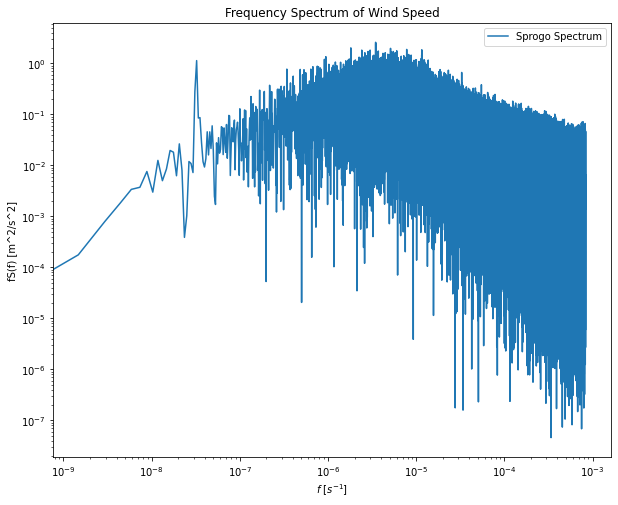

In [33]:
# Assign headers to the Sprogø data
headers_sprogo = ["timestamp", "wind_speed", "wind_direction_67.5", "wind_direction_70"]

# Read the Sprogø dataset from 'sprog.tsv'
df_sprogo = pd.read_csv("sprog.tsv", sep="\t", names=headers_sprogo)

# Convert DataFrame to numpy array for more flexible processing
array_sprogo = df_sprogo.to_numpy(dtype=object)

# Replace erroneous values (99.99) in Sprogø data with NaN
for i in range(array_sprogo.shape[0]):
    for j in range(array_sprogo.shape[1]):
        if array_sprogo[i][j] == 99.99:
            array_sprogo[i][j] = np.nan

# Convert to float to ensure all data is numeric
array_sprogo = array_sprogo.astype(float)

# Extract wind speed, ignoring NaN values
wind_speed = array_sprogo[:, 1][~np.isnan(array_sprogo[:, 1])]

fs = 1/600 #Hz

k_guess = 1
N = len(wind_speed)
N_series = N // k_guess
spectra_avg_u = []





for k in range(k_guess):
    Series_k_u = wind_speed[k * N_series:(k + 1) * N_series]

    # Frequency Estimations
    N_f = N_series // 2
    f_l_1 = np.fft.fftfreq(N_series, 1 / fs)[:N_f]

    # Spectra Calculation
    spectra_u = 1/(2*np.pi*N_series*fs)*np.abs(np.fft.fft(Series_k_u))**2

    spectra_avg_u.append(spectra_u[:N_f])

spectra_avg_u_1 = np.mean(spectra_avg_u, axis=0)

spectra_avg_u_1[0] = spectra_avg_u_1[1]

# creating f*S
spectra_plot_1= f_l_1*spectra_avg_u_1



# Plot fS(f) vs f on a logarithmic scale
plt.figure(figsize=(10, 8))
plt.loglog(f_l_1, spectra_plot_1, label='Sprogo Spectrum')
plt.xlabel("$f \ [s^{-1}]$")
plt.ylabel("fS(f) [m^2/s^2]")
plt.title("Frequency Spectrum of Wind Speed")
#plt.grid(True, which="both")
plt.legend()
plt.show()





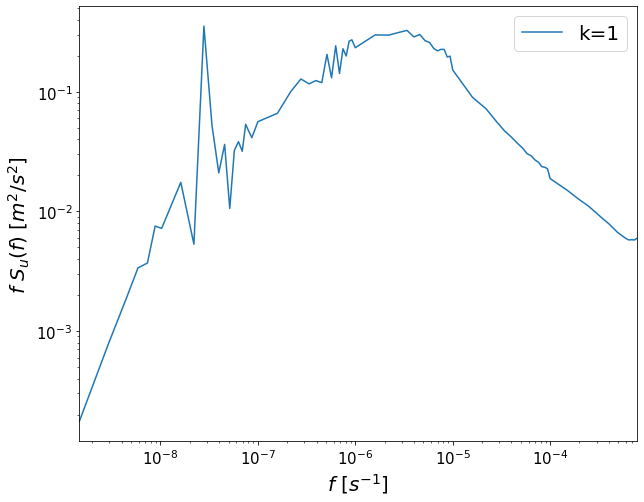

In [34]:
decade_1_1 = f_l_1[f_l_1 < 1e-9]
decade_1_2 = f_l_1[(f_l_1 < 1e-8) & (f_l_1 > 1e-9)]
decade_1_3 = f_l_1[(f_l_1 < 1e-7) & (f_l_1 > 1e-8)]
decade_1_4 = f_l_1[(f_l_1 < 1e-6) & (f_l_1 > 1e-7)]
decade_1_5 = f_l_1[(f_l_1 < 1e-5) & (f_l_1 > 1e-6)]
decade_1_6 = f_l_1[(f_l_1 < 1e-4) & (f_l_1 > 1e-5)]
decade_1_7 = f_l_1[(f_l_1 < 1e-3) & (f_l_1 > 1e-4)]
decade_1_8 = f_l_1[f_l_1 > 1e-3]



group_1_1 = spectra_plot_1[0:len(decade_1_1)]
group_1_2 = spectra_plot_1[(f_l_1 < 1e-8) & (f_l_1 > 1e-9)]
group_1_3 = spectra_plot_1[(f_l_1 < 1e-7) & (f_l_1 > 1e-8)]
group_1_4 = spectra_plot_1[(f_l_1 < 1e-6) & (f_l_1 > 1e-7)]
group_1_5 = spectra_plot_1[(f_l_1 < 1e-5) & (f_l_1 > 1e-6)]
group_1_6 = spectra_plot_1[(f_l_1 < 1e-4) & (f_l_1 > 1e-5)]
group_1_7 = spectra_plot_1[(f_l_1 < 1e-3) & (f_l_1 > 1e-4)]
group_1_8 = spectra_plot_1[f_l_1 > 1e-3]

values_group_1_1 = group_1_1
values_group_1_2 = group_1_2


def calculate_means(group):
    
    means = np.mean([group[i:i+len(group)//15] for i in np.arange(0, len(group) - len(group)//15, len(group)//15)], axis=1)

    return means

values_group_1_3 = calculate_means(group_1_3)
values_group_1_4 = calculate_means(group_1_4)
values_group_1_5 = calculate_means(group_1_5)
values_group_1_6 = calculate_means(group_1_6)
values_group_1_7 = calculate_means(group_1_7)

group_1 = np.concatenate((values_group_1_2, values_group_1_3, values_group_1_4, values_group_1_5, values_group_1_6, values_group_1_7))

indices_3 = np.arange(0, len(group_1_3) - len(group_1_3) // 15, len(group_1_3) // 15)
indices_4 = np.arange(0, len(group_1_4) - len(group_1_4) // 15, len(group_1_4) // 15)
indices_5 = np.arange(0, len(group_1_5) - len(group_1_5) // 15, len(group_1_5) // 15)
indices_6 = np.arange(0, len(group_1_6) - len(group_1_6) // 15, len(group_1_6) // 15)
indices_7 = np.arange(0, len(group_1_7) - len(group_1_7) // 15, len(group_1_7) // 15)
 


decade_1 = np.concatenate((decade_1_2,
                           decade_1_3[indices_3],
                           decade_1_4[indices_4],
                           decade_1_5[indices_5],
                           decade_1_6[indices_6],
                           decade_1_7[indices_7]))

plt.figure(figsize = (10,8))
plt.plot(decade_1, group_1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("$f \ S_u(f) \ [m^2/s^2]$", size = 20)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(("k=1", "k=6"), fontsize=20)
plt.xlim((min(decade_1),max(decade_1)))
plt.grid(visible=False, which="both")
plt.show()

# DATA 3

variance 2: 1.005793611470343
variance 2: 1.1788706524668766
variance 2: 5.674523987468333
Results for c_ar = 0.1:
Mean of time series: 0.01725893936895199
Variance of time series: 1.005793611470343

Results for c_ar = 0.4:
Mean of time series: -0.003980786560544799
Variance of time series: 1.1788706524668766

Results for c_ar = 0.9:
Mean of time series: 0.08277247314901207
Variance of time series: 5.674523987468333


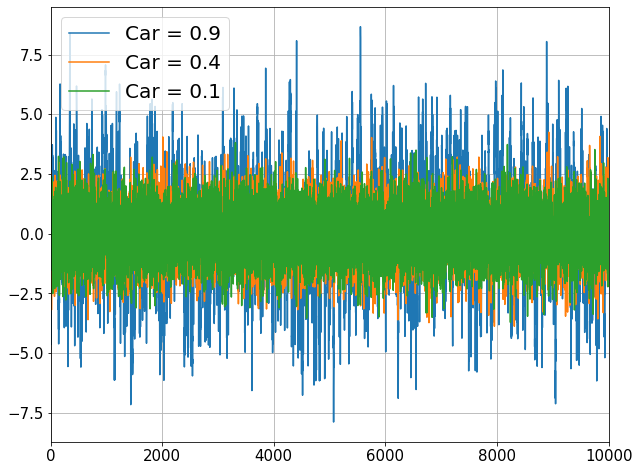

In [35]:
import numpy as np

# Parameters
N = 10000  # Number of points in each time series (can increase as needed)
c_values = [0.1, 0.4, 0.9]  # Different c_ar values to simulate
initial_variance = lambda c: 1 / (1 - c**2)  # Initial variance
delta_t=1
X_list=[]
# Simulate AR(1) processes
time_series_data = {}
for c in c_values:
    X = np.zeros(N)
    # Initialize X1 with zero mean and specified variance
    X[0] = np.random.normal(0, np.sqrt(initial_variance(c)))
    
    
    # Generate the time series
    for n in range(1, N):
        X[n] = c * X[n - 1] + np.random.normal(0, 1)  # Gaussian noise with mean 0 and variance 1
    
    # Calculate mean and variance
    mean_X = np.mean(X)
    var_X = np.var(X)
    print(f"variance 2: {var_X}")
    
    # Store results
    time_series_data[c] = {
        "time_series": X,
        "mean": mean_X,
        "variance": var_X
    }
    X_list.append(X)



# Display results
for c, data in time_series_data.items():
    print(f"Results for c_ar = {c}:")
    print(f"Mean of time series: {data['mean']}")
    print(f"Variance of time series: {data['variance']}\n")


# plt.figure(figsize = (10,8))
# plt.plot(np.linspace(1,N*delta_t,1), X[0])
# plt.ylabel("$f \ S_u(f) \ [m^2/s^2]$", size = 20)
# plt.xlabel("$f \ [s^{-1}]$", size = 20)
# #plt.legend(("k=1", "k=6"), fontsize=20)
# #plt.xlim((min(decade_1),max(decade_1)))
# #plt.grid(visible=False, which="both")
# plt.show()

plt.figure(figsize = (10,8))
plt.plot(X_list[2])
plt.plot(X_list[1])
plt.plot(X_list[0])
plt.legend(("Car = 0.9", "Car = 0.4", "Car = 0.1"), fontsize = "20")
plt.grid(visible=True, which="both")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlim((0,N))
plt.show()

[ 1.00000000e+00  9.19388659e-02  2.22009903e-02  8.02416406e-04
 -1.54716642e-02 -1.19910671e-02  1.24802820e-03 -4.23706937e-03
  4.25670759e-03  5.27502862e-04 -5.12253556e-03 -1.85131645e-02
 -2.18635739e-02 -1.48540606e-02 -7.72597888e-03 -4.01883163e-03
 -2.62146726e-03 -8.03817040e-03  1.33526456e-03 -1.18833095e-02
 -1.09606748e-02  6.23905854e-03 -5.62148983e-03  1.10795145e-02
 -7.48156128e-03  1.02100585e-02  1.18222372e-02  1.74518981e-02
  4.29658023e-03 -7.95295735e-04 -1.36595328e-02 -5.66529925e-03
  1.75336930e-02 -7.13504812e-04  4.07486411e-03  5.21016004e-03
 -1.28964019e-03 -5.80671314e-03 -2.96299194e-03 -8.32676215e-03
 -1.49118633e-02 -1.61293208e-02 -4.31705648e-04  3.15427480e-03
 -2.46482360e-03 -1.00103268e-02  1.63505908e-02  4.71524027e-03
 -6.45555501e-03 -1.25517886e-02  5.38007496e-03  6.85887168e-03
  1.30740112e-02  7.69684470e-03 -7.10010776e-03  1.55042754e-03
  1.11736299e-02 -2.48745431e-02 -1.08207232e-02 -7.37052412e-03
 -7.34538768e-03 -1.38348

C:\Users\alexm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


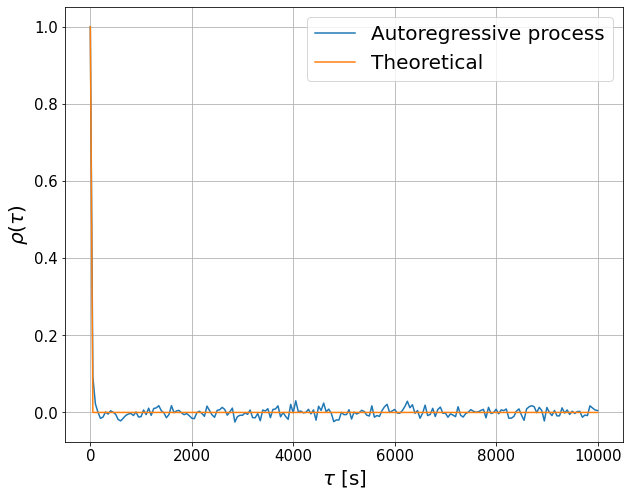

C:\Users\alexm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[ 1.00000000e+00  4.08293350e-01  1.49516110e-01  5.62273864e-02
  3.42219381e-02  1.03789741e-02 -4.73856945e-03 -1.87345588e-02
 -8.87286802e-03 -1.32313586e-02 -1.04760724e-02 -8.44935460e-03
 -1.61552506e-03 -8.68011539e-03 -2.40568585e-04  1.22199782e-02
  1.40299385e-02  2.26074507e-02  2.10695750e-02  5.37905128e-03
 -1.15906401e-02 -3.28249866e-03  1.14508078e-02  1.93567168e-02
  1.95107344e-02  1.19735265e-02 -4.25111089e-03 -6.50831446e-03
 -1.39821911e-02 -2.32128800e-03 -1.15978519e-02 -2.67710088e-02
 -2.08095311e-02 -8.09768318e-03  1.03797051e-03  1.31822825e-02
 -1.69437748e-03 -2.10827365e-03 -1.08577445e-02 -1.35555644e-02
 -6.32212700e-04  3.82024677e-03 -1.20365541e-02 -1.97299288e-02
 -1.06305707e-02 -1.08917127e-02 -2.27443058e-03 -5.22344499e-03
  6.94299699e-03  1.10269543e-02  1.56954725e-02  7.43277319e-03
  8.28347036e-03  2.21795864e-02  2.52908521e-02 -2.79446240e-03
  6.62391478e-04  1.17138110e-02  5.04226432e-03  6.20585302e-03
  1.79629193e-04 -1.32125

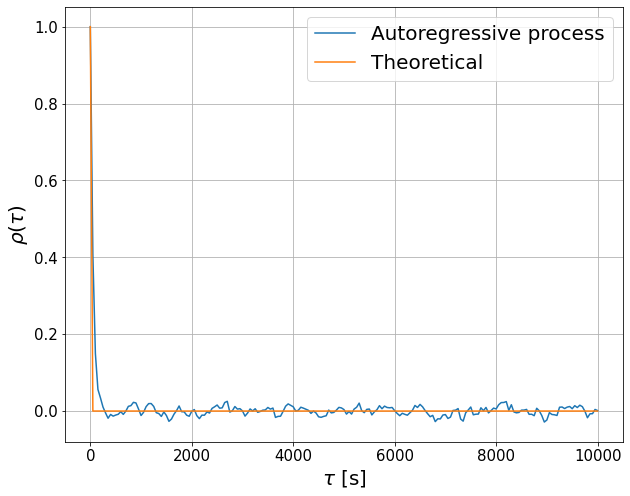

[ 1.00000000e+00  9.07519919e-01  8.22359060e-01  7.47287352e-01
  6.79571973e-01  6.19359350e-01  5.67210680e-01  5.20829618e-01
  4.80467492e-01  4.42215550e-01  4.06917889e-01  3.72553143e-01
  3.38713814e-01  3.09740765e-01  2.85176854e-01  2.58151069e-01
  2.32735493e-01  2.10735472e-01  1.95964530e-01  1.79826306e-01
  1.62837749e-01  1.46233329e-01  1.32219549e-01  1.20899423e-01
  1.12255033e-01  1.02491462e-01  9.20279621e-02  8.47209028e-02
  7.74446425e-02  6.73844352e-02  5.73248165e-02  5.08195517e-02
  4.40485673e-02  3.67874721e-02  3.08977994e-02  2.75121324e-02
  2.27431351e-02  1.94966934e-02  1.91257439e-02  2.02363344e-02
  2.12087695e-02  2.15018325e-02  2.07369018e-02  1.66820594e-02
  1.25476077e-02  8.96554519e-03  6.99683351e-03  4.18311667e-03
  5.87759245e-03  6.17458294e-03  6.88103794e-03  7.28163012e-03
  4.69846828e-03  1.34303907e-03 -2.14469176e-03 -3.35766825e-03
 -3.39998603e-03 -2.65994418e-03 -1.08253676e-03  1.87030670e-03
  1.97763517e-03  7.76295

C:\Users\alexm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


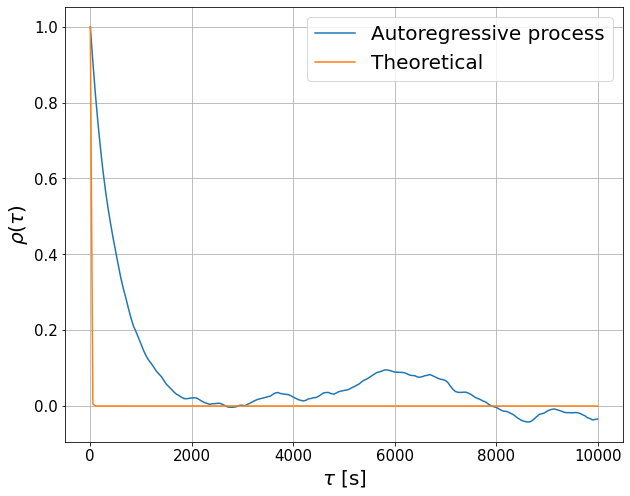

In [36]:
import statsmodels.api as sm


tau = np.linspace(0, N, 200, dtype=int)
rxxx = np.zeros((3,201))
times = tau*delta_t
rho_tau = np.zeros((3,len(tau)))
rho_car = np.zeros((3,len(tau)))

for i in range(3):
    rxxx[i] = sm.tsa.acf(X_list[i], nlags=200)
    rho_car[i] = c_values[i]**tau
    
 #   print(X[i])
 #   print(len(rxxx[i]))
    print(rxxx[i])

    plt.figure(figsize = (10,8))
    plt.plot(np.linspace(i,N,201)*delta_t, rxxx[i])
    plt.plot(np.linspace(i,N,200)*delta_t, rho_car[i,:])
    plt.grid(visible=True, which="both")
    plt.legend(("Autoregressive process", "Theoretical"), fontsize = "20")
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.xlabel(r"$ \tau $ [s]", size=20)
    plt.ylabel(r"$ \rho (\tau)$", size=20)
    plt.show()



# 3 d

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/302582977.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


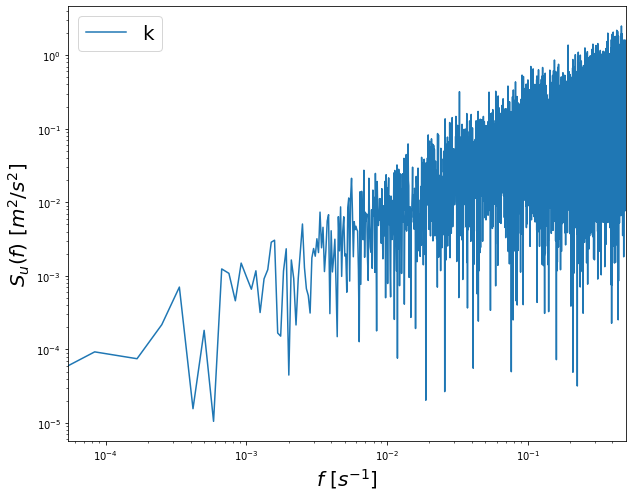

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/302582977.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


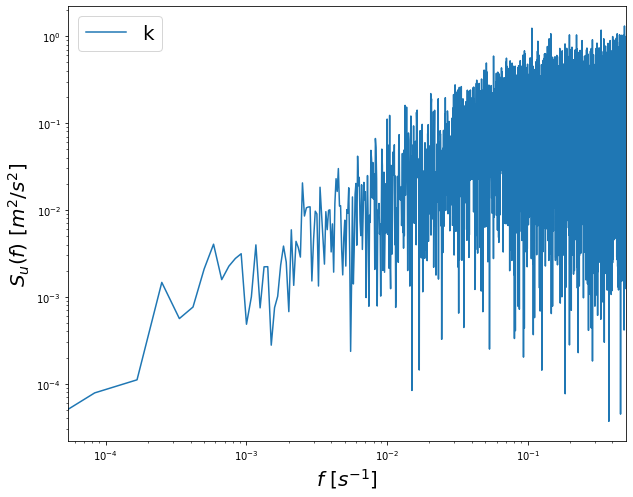

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/302582977.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


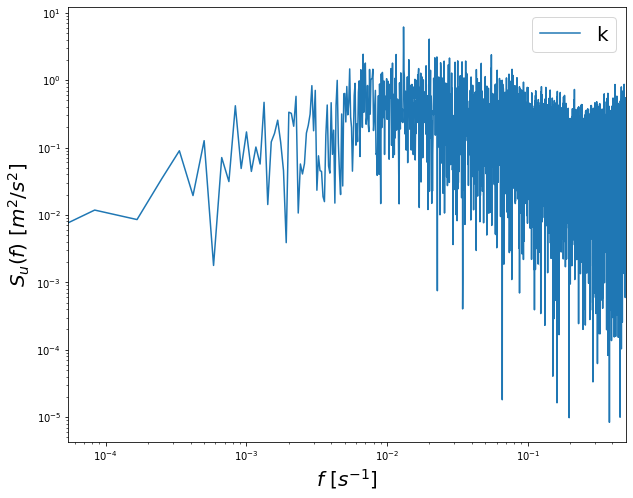

In [43]:
fs = 1/1 #Hz

k_guess = 1
for X in X_list:
    spectra_avg_u = []

    # Frequency Estimations
    N_f = N // 2
    f_l_1 = np.fft.fftfreq(N, 1 / fs)[:N_f]


    for k in range(k_guess):
        Series_k_u = X[k * N:(k + 1) * N]

        # Spectra Calculation
        spectra_u = 1/(2*np.pi*N*fs)*np.abs(np.fft.fft(Series_k_u))**2

        spectra_avg_u.append(spectra_u[:N_f])

    spectra_avg_u_1 = np.mean(spectra_avg_u, axis=0)

    spectra_avg_u_1[0] = spectra_avg_u_1[1]

    # creating f*S
    spectra_plot_1= f_l_1*spectra_avg_u_1

    plt.figure(figsize = (10,8))
    plt.plot(f_l_1, spectra_plot_1)
    #plt.plot(f_l_6, spectra_avg_u_6)
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
    #plt.xticks(size = 15)
    #plt.yticks(size = 15)
    plt.xlabel("$f \ [s^{-1}]$", size = 20)
    plt.legend("k=1", fontsize = "20")
    #plt.grid(visible=True, which="both")
    plt.xlim((np.min(f_l_1),np.max(f_l_1)))
    plt.show()

In [38]:
X_list

[array([ 0.29926064,  0.31588382, -0.61924487, ...,  1.00018856,
         1.06547121,  0.5914602 ]),
 array([ 0.11208623,  0.81920388,  2.1927575 , ...,  1.12370117,
        -0.34873679, -1.86812197]),
 array([ 0.42593489, -0.86347786, -1.11831837, ..., -1.54868993,
        -1.64411993, -1.72149128])]

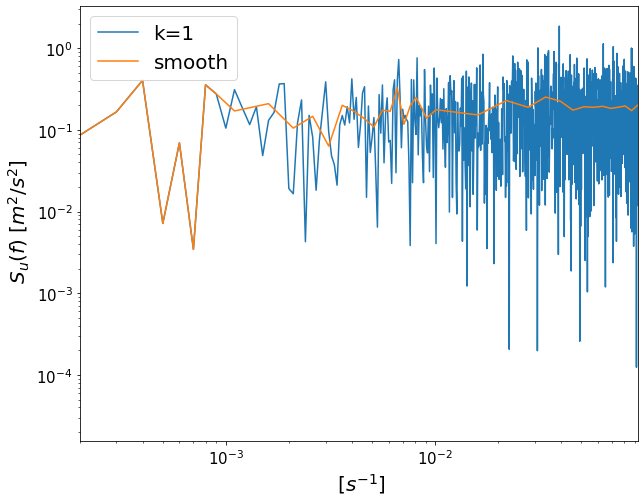

Slope: 0.014996432838474062


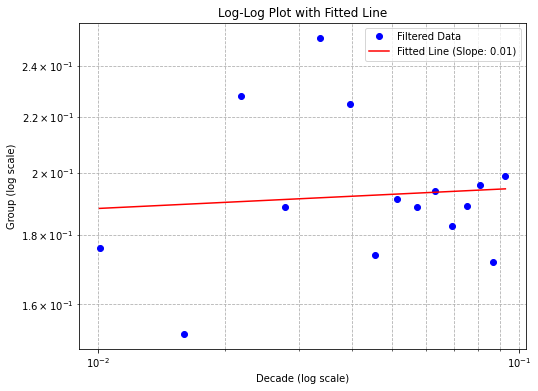

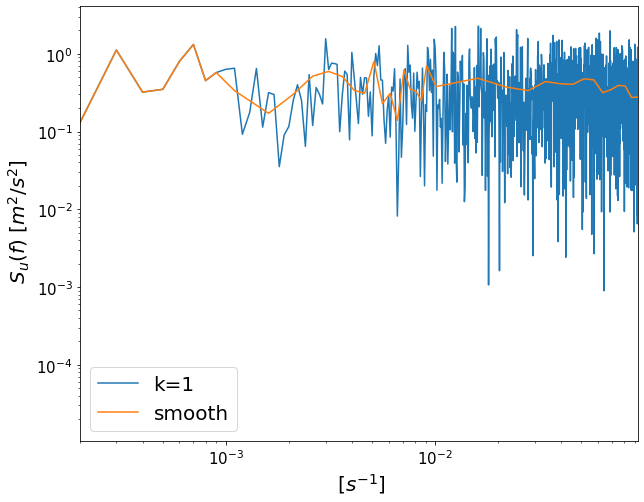

Slope: -0.11077739760464624


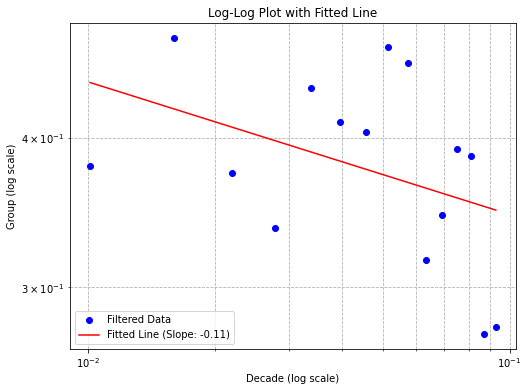

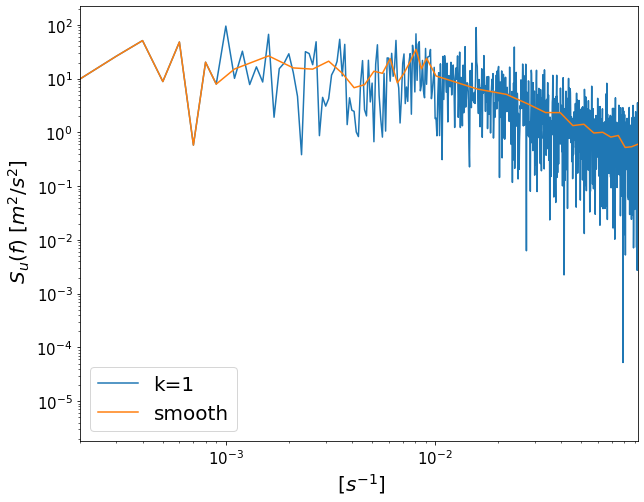

Slope: -1.4254796905298055


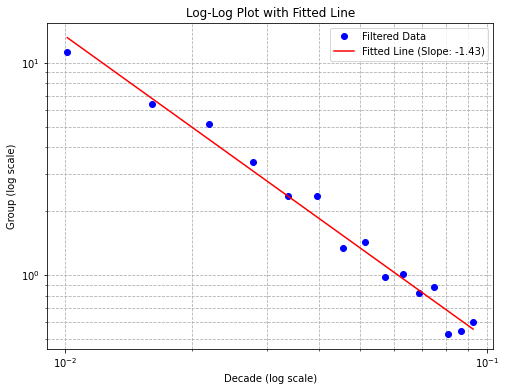

In [39]:

fs = 1 #Hz

k_guess = 1
for X in X_list:
    spectra_avg_u = []

    # Frequency Estimations
    N_f = N // 2
    f_l_1 = np.fft.fftfreq(N, 1 / fs)[:N_f]


    for k in range(k_guess):
        Series_k_u = X[k * N:(k + 1) * N]

        # Spectra Calculation
        spectra_u = 1/(2*np.pi*N*fs)*np.abs(np.fft.fft(Series_k_u))**2

        spectra_avg_u.append(spectra_u[:N_f])

    spectra_avg_u_1 = np.mean(spectra_avg_u, axis=0)

    spectra_avg_u_1[0] = spectra_avg_u_1[1]

    # creating f*S
    #spectra_plot_1= f_l_1*spectra_avg_u_1
    spectra_plot_1= spectra_avg_u_1

    
# smoothing filter
    decade_1_1 = f_l_1[f_l_1 < 1e-4]
    decade_1_2 = f_l_1[(f_l_1 < 1e-3) & (f_l_1 > 1e-4)]
    decade_1_3 = f_l_1[(f_l_1 < 1e-2) & (f_l_1 > 1e-3)]
    decade_1_4 = f_l_1[(f_l_1 < 1e-1) & (f_l_1 > 1e-2)]
    decade_1_5 = f_l_1[f_l_1 > 1e-1]



    group_1_1 = spectra_plot_1[0:len(decade_1_1)]
    group_1_2 = spectra_plot_1[(f_l_1 < 1e-3) & (f_l_1 > 1e-4)]
    group_1_3 = spectra_plot_1[(f_l_1 < 1e-2) & (f_l_1 > 1e-3)]
    group_1_4 = spectra_plot_1[(f_l_1 < 1e-1) & (f_l_1 > 1e-2)]
    group_1_5 = spectra_plot_1[f_l_1 > 1e-1]

    values_group_1_1 = group_1_1
    values_group_1_2 = group_1_2


    def calculate_means(group):
        
        means = np.mean([group[i:i+len(group)//15] for i in np.arange(0, len(group) - len(group)//15, len(group)//15)], axis=1)

        return means

    values_group_1_3 = calculate_means(group_1_3)
    values_group_1_4 = calculate_means(group_1_4)
    # values_group_1_5 = calculate_means(group_1_5)
    # values_group_1_6 = calculate_means(group_1_6)
    # values_group_1_7 = calculate_means(group_1_7)

    group_1 = np.concatenate((values_group_1_2, values_group_1_3, values_group_1_4))
    indices_3 = np.arange(0, len(group_1_3) - len(group_1_3) // 15, len(group_1_3) // 15)
    indices_4 = np.arange(0, len(group_1_4) - len(group_1_4) // 15, len(group_1_4) // 15)
    # indices_5 = np.arange(0, len(group_1_5) - len(group_1_5) // 15, len(group_1_5) // 15)
    # indices_6 = np.arange(0, len(group_1_6) - len(group_1_6) // 15, len(group_1_6) // 15)
    # indices_7 = np.arange(0, len(group_1_7) - len(group_1_7) // 15, len(group_1_7) // 15)
    


    decade_1 = np.concatenate((decade_1_2,
                            decade_1_3[indices_3],
                            decade_1_4[indices_4]))

    plt.figure(figsize = (10,8))
    plt.plot(f_l_1, spectra_plot_1)
    plt.plot(decade_1, group_1)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("$\ S_u(f) \ [m^2/s^2]$", size = 20)
    plt.xlabel("$\ [s^{-1}]$", size = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.legend(("k=1", "smooth"), fontsize=20)
    plt.xlim((min(decade_1),max(decade_1)))
    plt.grid(visible=False, which="both")
    plt.show()




    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress


    
    # Filter values where x > 0.01
    filtered_x = decade_1[decade_1 > 0.01]
    filtered_y = group_1[decade_1 > 0.01]

    # Take the logarithm of both x and y for the log relation
    log_x = np.log(filtered_x)
    log_y = np.log(filtered_y)

    # Calculate the slope using linear regression on the log-transformed data
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    print(f"Slope: {slope}")

    # Plot the data in a log-log plot
    plt.figure(figsize=(8, 6))
    plt.loglog(filtered_x, filtered_y, 'o', label="Filtered Data", color='blue')
    plt.loglog(filtered_x, np.exp(intercept) * filtered_x ** slope, color='red', label=f'Fitted Line (Slope: {slope:.2f})')

    # Add labels and legend
    plt.xlabel("Decade (log scale)")
    plt.ylabel("Group (log scale)")
    plt.title("Log-Log Plot with Fitted Line")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

    
    # plt.figure(figsize = (10,8))
    # plt.plot(freq, spectra_auto[:,i])
    # plt.plot(decade_1[:,i],smooth[:,i], linewidth = 3)
    # plt.ylabel("$S(f) \ [m^2/s^2]$", size = 20)
    # plt.xticks(size = 15)
    # plt.yticks(size = 15)
    # plt.xlabel("$f \ [s^{-1}]$", size = 20)
    # plt.grid(visible=True, which="both")
    # plt.yscale("log")
    # plt.xscale("log")
    # plt.xlim((min(decade_1),max(decade_5)))
    # plt.show()


    

## DATASET 4

[3.98561779e+01 2.47425093e+01 1.83048590e+01 ... 3.51393802e-02
 3.51344991e-02 3.51296194e-02]


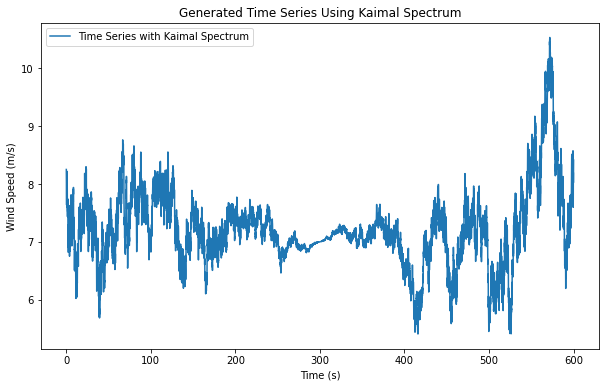

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (you can adjust these based on your needs)
T = 600 # Seconds
delta_t = 0.05  # Frequency resolution
N = int(T / delta_t)  # Length of the time series
f_s = 1/delta_t #Sampling frequency (Hz)
U = 7  # Mean wind speed (m/s)
z = 80  # Height (m)
u_star = 0.25  # Friction velocity (m/s)

frequencies = np.linspace(f_s/N, 1/delta_t, num=int(N/2))

# Define Kaimal spectrum function
def kaimal_spectrum(f, U, z, u_star):
    return (u_star**2 * 52.5 * z / U) / (1 + 33 * f * z / U)**(5/3)

# # Generate frequencies
# frequencies = np.fft.fftfreq(N, d=f)[:N//2]


# Generate random complex numbers (Gaussian distributed)
random_real = np.random.normal(0, 1, int(N/2))
random_imag = np.random.normal(0, 1, int(N/2))
X_tilde = random_real + 1j * random_imag

# Compute Fourier amplitudes from Kaimal spectrum
Kaimal = kaimal_spectrum(frequencies, U, z, u_star)
sigma_f = np.sqrt(kaimal_spectrum(frequencies, U, z, u_star)*N/(2*np.pi*f_s))
print(sigma_f)

# Apply Fourier amplitudes
X_tilde *= sigma_f

# Expand X as per the given structure in the image
#X = np.zeros(N, dtype=complex)
#X[:N//2] = X_tilde
#X[N//2:] = np.conj(X_tilde[::-1])

X = np.concatenate((X_tilde, np.flip(np.conj(X_tilde))))


# Perform inverse Fourier transform to obtain the time series
#x_n = np.fft.ifft(X).real*(2*np.pi/delta_t) # Normalize the result if needed
x_n = np.real(np.fft.ifft(X))*(2*np.pi/delta_t)

u = x_n + U

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 600, len(u)), u, label="Time Series with Kaimal Spectrum")
plt.xlabel("Time (s)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Generated Time Series Using Kaimal Spectrum")
plt.legend()
plt.show()

## b)

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/420131103.py:37: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


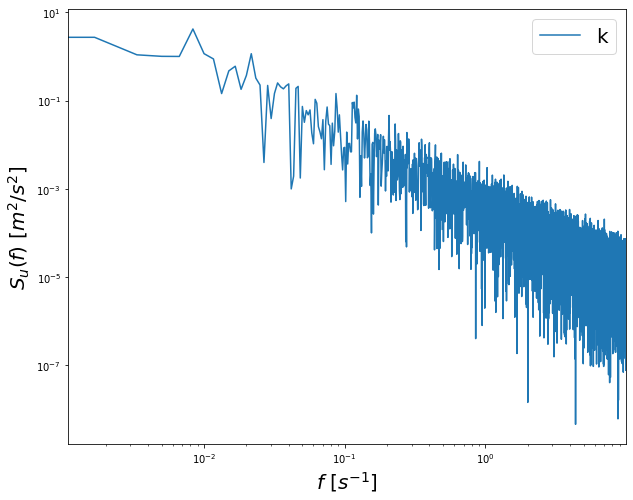

C:\Users\alexm\AppData\Local\Temp/ipykernel_21004/420131103.py:95: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(decade_1),max(decade_1)))


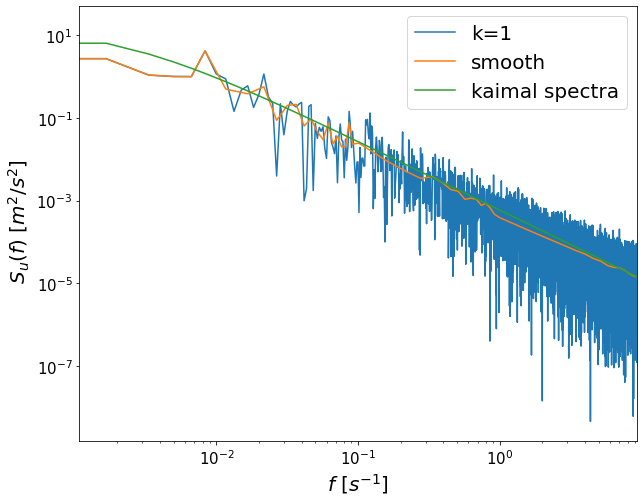

In [41]:
fs = f_s #Hz
X = u
k_guess = 1
spectra_avg_u = []
# Frequency Estimations
N_f = N // 2
f_l_1 = np.fft.fftfreq(N, 1 / fs)[:N_f]


for k in range(k_guess):
    Series_k_u = X[k * N:(k + 1) * N]

    # Spectra Calculation
    spectra_u = 1/(2*np.pi*N*fs)*np.abs(np.fft.fft(Series_k_u))**2

    spectra_avg_u.append(spectra_u[:N_f])

    spectra_avg_u_1 = np.mean(spectra_avg_u, axis=0)

    spectra_avg_u_1[0] = spectra_avg_u_1[1]

    # creating f*S
    #spectra_plot_1= f_l_1*spectra_avg_u_1
    spectra_plot_1= spectra_avg_u_1

    plt.figure(figsize = (10,8))
    plt.plot(f_l_1, spectra_avg_u_1)
    #plt.plot(f_l_6, spectra_avg_u_6)
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
    #plt.xticks(size = 15)
    #plt.yticks(size = 15)
    plt.xlabel("$f \ [s^{-1}]$", size = 20)
    plt.legend("k=1", fontsize = "20")
    #plt.grid(visible=True, which="both")
    plt.xlim((np.min(f_l_1),np.max(f_l_1)))
    plt.show()
    
    
# smoothing filter
    decade_1_1 = f_l_1[f_l_1 < 1e-2]
    decade_1_2 = f_l_1[(f_l_1 < 1e-1) & (f_l_1 > 1e-2)]
    decade_1_3 = f_l_1[(f_l_1 < 1e-0) & (f_l_1 > 1e-1)]
    decade_1_4 = f_l_1[f_l_1 > 1e-0]



    group_1_1 = spectra_plot_1[0:len(decade_1_1)]
    group_1_2 = spectra_plot_1[(f_l_1 < 1e-1) & (f_l_1 > 1e-2)]
    group_1_3 = spectra_plot_1[(f_l_1 < 1e-0) & (f_l_1 > 1e-1)]
    group_1_4 = spectra_plot_1[f_l_1 > 1e-0]

    values_group_1_1 = group_1_1
    #values_group_1_2 = group_1_2


    def calculate_means(group):
        
        means = np.mean([group[i:i+len(group)//15] for i in np.arange(0, len(group) - len(group)//15, len(group)//15)], axis=1)

        return means

    values_group_1_2 = calculate_means(group_1_2)
    values_group_1_3 = calculate_means(group_1_3)
    values_group_1_4 = calculate_means(group_1_4)
    # values_group_1_5 = calculate_means(group_1_5)
    # values_group_1_6 = calculate_means(group_1_6)
    # values_group_1_7 = calculate_means(group_1_7)

    group_1 = np.concatenate((values_group_1_1, values_group_1_2, values_group_1_3, values_group_1_4))
    indices_2 = np.arange(0, len(group_1_2) - len(group_1_2) // 15, len(group_1_2) // 15)
    indices_3 = np.arange(0, len(group_1_3) - len(group_1_3) // 15, len(group_1_3) // 15)
    indices_4 = np.arange(0, len(group_1_4) - len(group_1_4) // 15, len(group_1_4) // 15)
    # indices_5 = np.arange(0, len(group_1_5) - len(group_1_5) // 15, len(group_1_5) // 15)
    # indices_6 = np.arange(0, len(group_1_6) - len(group_1_6) // 15, len(group_1_6) // 15)
    # indices_7 = np.arange(0, len(group_1_7) - len(group_1_7) // 15, len(group_1_7) // 15)
    


    decade_1 = np.concatenate((decade_1_1, decade_1_2[indices_2], decade_1_3[indices_3], decade_1_4[indices_4]))
    
    
    plt.figure(figsize = (10,8))
    plt.plot(f_l_1, spectra_avg_u_1)
    plt.plot(decade_1, group_1)
    plt.plot(f_l_1, Kaimal)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("$\ S_u(f) \ [m^2/s^2]$", size = 20)
    plt.xlabel("$f \ [s^{-1}]$", size = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.legend(("k=1", "smooth", "kaimal spectra"), fontsize=20)
    plt.xlim((min(decade_1),max(decade_1)))
    plt.grid(visible=False, which="both")
    plt.show()